In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
ANN_classifier = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

In [3]:
learning_rate = 0.1
loss_fxn = nn.BCELoss()
optmiser = torch.optim.SGD(ANN_classifier.parameters(), lr=learning_rate)
epoch = 1000

# Data

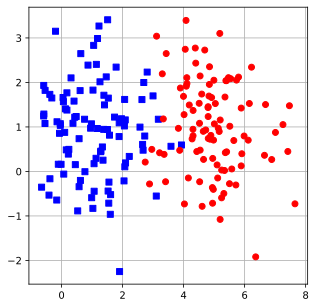

In [4]:
N = 100
noise = 1
A_center = [1,1]
B_center = [5,1]

a = [A_center[0] + np.random.randn(N)*noise, A_center[1] + np.random.randn(N)*noise]
b = [B_center[0] + np.random.randn(N)*noise, B_center[1] + np.random.randn(N)*noise]

labels = np.vstack((np.zeros((N,1)), np.ones((N,1))))  # making vertical stack of [00000...11111....] for category
data = np.hstack((a,b)).T

x = torch.tensor(data).float()
y = torch.tensor(labels).float()

# x
# (y==1).T[0]
# x[(y==0).T[0], 0]
# x[(y==1).T[0], 1]

fig = plt.figure(figsize=(5,5))
plt.plot(x[(y==0).T[0], 0], x[(y==0).T[0], 1], 'bs')  # Category Type = 0
plt.plot(x[(y==1).T[0], 0], x[(y==1).T[0], 1], 'ro')  # Category Type = 0
plt.grid()

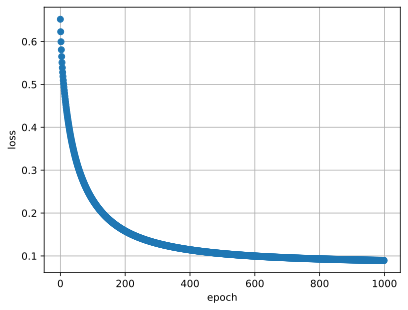

In [5]:
loss_list = torch.zeros(epoch)

for ep in range(epoch):
    y_ = ANN_classifier(x)
    
    loss = loss_fxn(y_, y)
    loss_list[ep] = loss
    
    optmiser.zero_grad()
    loss.backward()
    optmiser.step()
    
plt.plot(loss_list.detach(), 'o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

In [10]:
prediction = ANN_classifier(x) > 0.5
missclassified = np.where(prediction != y)[0]

accuracy = 100 - 100*len(missclassified)/(2*N)
print("Accuracy = ", accuracy)

Accuracy =  96.5


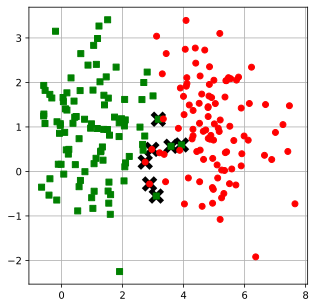

In [24]:
fig = plt.figure(figsize=(5,5))
plt.plot(x[missclassified, 0], x[missclassified, 1], 'kx', markersize=12, markeredgewidth=5)

plt.plot(x[(y==0).T[0], 0], x[(y==0).T[0], 1], 'gs')  # Category Type = 0
plt.plot(x[(y==1).T[0], 0], x[(y==1).T[0], 1], 'ro')  # Category Type = 0

plt.grid()